In [2]:
import pandas as pd

df = pd.read_csv("friskvard_data_clean.csv")
df.head()



,bokning_id,medlem_id,medlemstyp,medlem_startdatum,medlem_slutdatum,månadskostnad,födelseår,pass_id,passnamn,anläggning,...,status,feedback_text,feedbackdatum,feedback_betyg,medlem_startdatum_clean,medlem_slutdatum_clean,bokningsdatum_clean,passdatum_clean,feedbackdatum_clean,age
0,BOK-000001,MED-10158,Premium,2023-07-29,2025-07-03,599,2006.0,PASS-2024-10-01-001,Yoga,Göteborg Centrum,...,Genomförd,Bästa yogapasset jag varit på. Kommer tillbaka!,2024-10-02,4.0,2023-07-29,2025-07-03,2024-09-24,2024-10-01,2024-10-02,20.0
1,BOK-000002,MED-10229,Premium,2023-08-01,2025-06-26,599,1984.0,PASS-2024-12-04-002,Cykel,Malmö Centrum,...,Genomförd,Professionellt och välorganiserat pass.,2024-12-05,5.0,2023-08-01,2025-06-26,2024-11-27,2024-12-04,2024-12-05,42.0
2,BOK-000003,MED-10223,Student,2023-12-27,2025-05-12,249,2006.0,PASS-2024-11-09-003,Styrketräning,Nan,...,Genomförd,Unknown,Unknown,4.0,2023-12-27,2025-05-12,2024-11-08,2024-11-09,NaN,20.0
3,BOK-000004,MED-10110,Bas,"July 03, 2023",2025-03-24,349,2006.0,PASS-2024-09-04-004,Pilates,Göteborg Centrum,...,Klar,Professionellt och välorganiserat pass.,2024-09-02,5.0,2023-07-03,2025-03-24,2024-09-01,2024-09-04,2024-09-02,20.0
4,BOK-000005,MED-10022,Premium,2022-11-05,2025-06-01,599,1992.0,PASS-2024-10-29-005,Pilates,Västerås,...,Genomförd,Bästa pilatespasset jag varit på. Kommer tillb...,2024-10-30,5.0,2022-11-05,2025-06-01,2024-10-26,2024-10-29,2024-10-30,34.0


In [3]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bokning_id               3075 non-null   str    
 1   medlem_id                3075 non-null   str    
 2   medlemstyp               3075 non-null   str    
 3   medlem_startdatum        3075 non-null   str    
 4   medlem_slutdatum         3075 non-null   str    
 5   månadskostnad            3075 non-null   int64  
 6   födelseår                3075 non-null   float64
 7   pass_id                  3075 non-null   str    
 8   passnamn                 3075 non-null   str    
 9   anläggning               3075 non-null   str    
 10  instruktör               3075 non-null   str    
 11  bokningsdatum            3075 non-null   str    
 12  passdatum                3075 non-null   str    
 13  passtid                  3075 non-null   str    
 14  status                   3075 non-n

In [4]:
# Each row represents one booked training session by one gym member


In [5]:
avg_cost_by_membership = df.groupby("medlemstyp")["månadskostnad"].mean()

avg_cost_by_membership


medlemstyp
Bas           337.509246
Basic         349.000000
Gold          599.000000
Grund         341.413043
Plus          599.000000
Premium       582.045793
Student       243.803887
Studerande    227.642857
Name: månadskostnad, dtype: float64

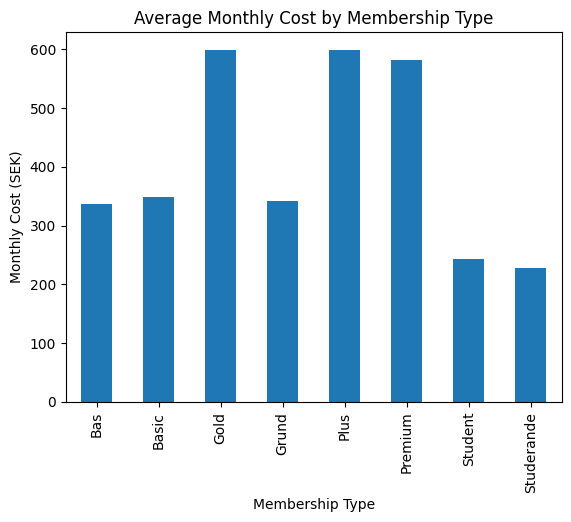

In [6]:
import matplotlib.pyplot as plt

avg_cost_by_membership.plot(kind="bar")
plt.title("Average Monthly Cost by Membership Type")
plt.ylabel("Monthly Cost (SEK)")
plt.xlabel("Membership Type")
plt.show()


In [7]:
bookings_per_facility = df["anläggning"].value_counts()

bookings_per_facility


anläggning
Malmö Västra Hamnen      250
Västerås                 246
Uppsala                  242
Stockholm City           234
Göteborg Hisingen        231
Lund                     229
Stockholm Södermalm      224
Göteborg Centrum         216
Malmö Centrum            214
Linköping                210
Stockholm Kungsholmen    206
Örebro                   201
Nan                       97
Linköping C               21
Malmö Vh                  18
Sthlm Södermalm           17
Uppsala C                 17
Södermalm                 16
Göteborg C                16
Sthlm Kungsholmen         15
Örebro C                  15
Malmö C                   15
Gbg Centrum               15
Lund C                    14
Malmö City                14
Sthlm City                13
Gbg Hisingen              13
Västra Hamnen             12
City                      11
Västerås C                11
Kungsholmen               11
Hisingen                  11
Name: count, dtype: int64

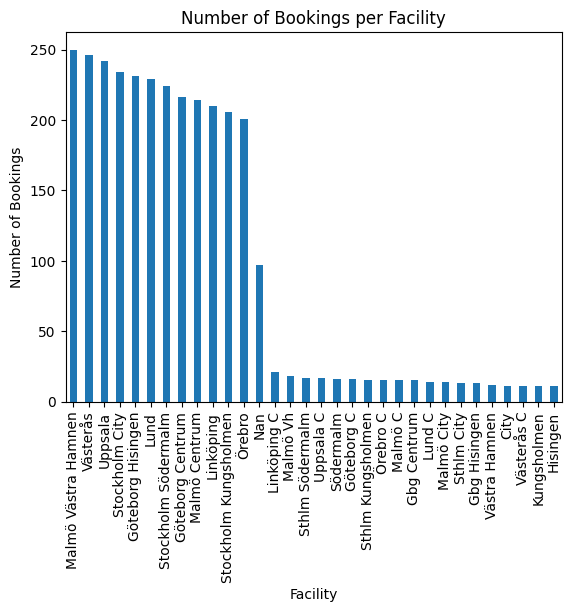

In [8]:
bookings_per_facility.plot(kind="bar")
plt.title("Number of Bookings per Facility")
plt.ylabel("Number of Bookings")
plt.xlabel("Facility")
plt.show()


In [10]:
from transformers import pipeline

sentiment_model = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment"
)

# Apply sentiment to feedback column (limit text length for safety)
df["sentiment_raw"] = df["feedback"].fillna("").apply(
    lambda x: sentiment_model(x[:512])[0]["label"] if x != "" else "Neutral"
)

df[["feedback", "sentiment_raw"]].head()


/Users/aftabazeem/Downloads/ETL Pipelines/.venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading weights: 100%|██████████| 201/201 [00:00<00:00, 914.43it/s, Materializing param=classifier.weight]                                      


KeyError: 'feedback'

In [11]:
from transformers import pipeline

sentiment_model = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment"
)

df["sentiment_raw"] = df["feedback_text"].fillna("").apply(
    lambda x: sentiment_model(x[:512])[0]["label"] if x not in ["", "Unknown"] else "Neutral"
)

df[["feedback_text", "sentiment_raw"]].head()


Loading weights: 100%|██████████| 201/201 [00:00<00:00, 924.55it/s, Materializing param=classifier.weight]                                      


,feedback_text,sentiment_raw
0,Bästa yogapasset jag varit på. Kommer tillbaka!,5 stars
1,Professionellt och välorganiserat pass.,5 stars
2,Unknown,Neutral
3,Professionellt och välorganiserat pass.,5 stars
4,Bästa pilatespasset jag varit på. Kommer tillb...,5 stars


In [12]:
def map_stars_to_sentiment(label):
    if label == "Neutral":
        return "neutral"
    stars = int(label.split()[0])
    if stars <= 2:
        return "negative"
    elif stars == 3:
        return "neutral"
    else:
        return "positive"

df["sentiment"] = df["sentiment_raw"].apply(map_stars_to_sentiment)

df["sentiment"].value_counts()


sentiment
neutral     2112
positive     787
negative     176
Name: count, dtype: int64

In [13]:
import sqlite3

conn = sqlite3.connect("friskvard.db")
df.to_sql("training_data", conn, if_exists="replace", index=False)
conn.close()


In [14]:
conn = sqlite3.connect("friskvard.db")
check_df = pd.read_sql(
    "SELECT bokning_id, medlemstyp, månadskostnad, sentiment FROM training_data LIMIT 5",
    conn
)
conn.close()

check_df


,bokning_id,medlemstyp,månadskostnad,sentiment
0,BOK-000001,Premium,599,positive
1,BOK-000002,Premium,599,positive
2,BOK-000003,Student,249,neutral
3,BOK-000004,Bas,349,positive
4,BOK-000005,Premium,599,positive
